In [88]:
from skimage.metrics import structural_similarity
import imutils
import cv2
from PIL import Image
import requests

In [89]:
!mkdir Image1
!mkdir Image1/image

In [90]:
original = Image.open(requests.get('https://www.thestatesman.com/wp-content/uploads/2019/07/pan-card.jpg', stream=True).raw)
tampered = Image.open(requests.get('https://assets1.cleartax-cdn.com/s/img/20170526124335/Pan4.png', stream=True).raw) 

In [91]:
image1 = Image.open(requests.get("https://i.pinimg.com/originals/ae/6f/6a/ae6f6a5300fc05166d058aabdf4fccc0.jpg", stream=True).raw)
image2 = Image.open(requests.get("https://www.diez.hn/binrepository/10.15288_DZ1503000_MG121074785.jpg", stream=True).raw)

In [92]:
print(image1.format)
print(image2.format)
print(image1.size)
print(image2.size)

JPEG
JPEG
(1893, 1213)
(600, 379)


In [93]:
image1 = image1.resize((250,160))
image1.save("Image1/image/image1.png")
image2 = image2.resize((250,160))
image2.save("Image1/image/image2.png")

In [94]:
image1 = cv2.imread('Image1/image/image1.png')
image2 = cv2.imread('Image1/image/image2.png')

In [95]:
image1_gray = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
image2_gray = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

In [96]:
(score, diff) = structural_similarity(image1_gray, image2_gray, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(score))

SSIM: 0.13790594872836795


In [97]:
thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

In [98]:
for c in cnts:
    (x, y, w, h) = cv2.boundingRect(c)
    cv2.rectangle(image1, (x, y), (x + w, y + h), (0, 0, 255), 2)
    cv2.rectangle(image2, (x, y), (x + w, y + h), (0, 0, 255), 2)

Image 1


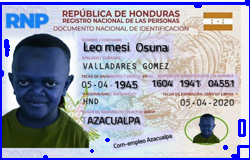

In [99]:
print('Image 1')
Image.fromarray(image1)

Image 2


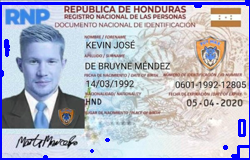

In [100]:
print('Image 2')
Image.fromarray(image2)

Different Image


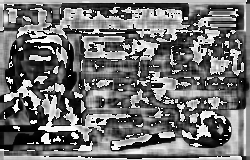

In [101]:
print('Different Image')
Image.fromarray(diff)

Threshold Image


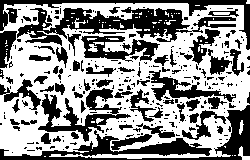

In [102]:
print('Threshold Image')
Image.fromarray(thresh)